In [1]:
import pandas as pd
import numpy as np
import requests
import io
import datetime as dt
from csv import reader
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table 

In [2]:
def read_file(url): 
    reader=requests.get(url).content
    reader=pd.read_csv(io.StringIO(reader.decode('utf-8')))# Reading the CSV into Pnadas
    return reader 

In [3]:
def save_file(name):            # Save File as CSV
    pd.to_csv(name)

In [4]:
def column_edit(dataset):                  # Editing Column Names
    final = [] 
    final_column = []         
    column = dataset.columns.str.strip().str.split("/")
    for data in column:
        data[0] = (data[0].replace("1", "January").replace("2", "Feburary").replace("3", "March")
                   .replace("4", "April").replace("5", "May"))
    
    for data in column:
        if len(data) < 3:
            data[0:] = ['/'.join(data[0:])]
            final.append(data)
        else:
            del data[2]
            data[0:] = ['_'.join(data[0:])]
            final.append(data)
            
    for data in final:
        final_column.append(data[0])
    dataset.columns = final_column
    return dataset

In [5]:
def numbers_per_day(dataset, total):         # Regenerating Numbers per day
    datasets = dataset.copy()
    dat = []
    i = 0
    for data in dataset.columns[4:]:
        if data == "January_22":
            dat.append(data)
        else: 
            datasets[data] = dataset[data] - dataset[dat[i]]
            dat.append(data)
            i += 1
    datasets.iloc[1:, 4:] = datasets.iloc[1:, 4:].astype(int)
    datasets[total] = datasets.iloc[:, 4:].sum(axis=1)
    return datasets

In [6]:
url_confirmed="https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"
confirmed = read_file(url_confirmed)

In [7]:
confirmed = column_edit(confirmed) # Editing column Names
confirmed

,Province/State,Country/Region,Lat,Long,January_22,January_23,January_24,January_25,January_26,January_27,...,May_22,May_23,May_24,May_25,May_26,May_27,May_28,May_29,May_30,May_31
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,981,989,998,1004,1029,1050,1076,1099,1122,1137
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,762,762,762,763,763,763,763,764,764,764
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,60,61,69,70,70,71,74,81,84,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,251,251,251,299,441,443,458,463,479,483
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,209,212,222,233,249,256,278,283,310,323
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,78,78,87,87,87,87,87,87,106,106
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,2551,2738,2929,3100,3266,3424,3563,3686,3807,3930


In [8]:
confirmed_per_day = numbers_per_day(confirmed, total = "Total_confirmed") # Generating Numbers Per day
confirmed_per_day

,Province/State,Country/Region,Lat,Long,January_22,January_23,January_24,January_25,January_26,January_27,...,May_23,May_24,May_25,May_26,May_27,May_28,May_29,May_30,May_31,Total_confirmed
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,782,584,591,658,625,580,623,866,680,15205
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,8,9,6,25,21,26,23,23,15,1137
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,195,193,197,194,160,140,137,133,127,9394
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,764
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1,8,1,0,1,3,7,3,2,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,48,142,2,15,5,16,4,483
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,3,10,11,16,7,22,5,27,13,323
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,9,0,0,0,0,0,19,0,106
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,187,191,171,166,158,139,123,121,123,3930


In [9]:
url_death = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv"
death = read_file(url_death)   # Reading global Number of Deaths 


In [10]:
death = column_edit(death)                       # Editing Clomn Names

In [11]:
death_per_day = numbers_per_day(death, total = "Total_death") # Generating Numbers per day

In [12]:
death_per_day

,Province/State,Country/Region,Lat,Long,January_22,January_23,January_24,January_25,January_26,January_27,...,May_23,May_24,May_25,May_26,May_27,May_28,May_29,May_30,May_31,Total_death
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,11,2,1,1,7,8,11,3,8,257
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,33
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,10,8,9,8,6,7,8,8,7,653
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,51
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,3,1,0,0,0,0,0,12
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,6,3,2,5,4,4,8,12,3,80
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,0,2,0,1,0,0,0,0,0,47


In [13]:
url_recovery = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv"
recovery = read_file(url_recovery)   # Reading Global recovery from Covid-19 per country

In [14]:
recovery = column_edit(recovery)                     # Editing Column Names

In [15]:
recovery_per_day = numbers_per_day(recovery, total = "Total_recovery")  # Generating Numbers per day

In [16]:
recovery_per_day[recovery_per_day["Country/Region"] == "Somalia"]


,Province/State,Country/Region,Lat,Long,January_22,January_23,January_24,January_25,January_26,January_27,...,May_23,May_24,May_25,May_26,May_27,May_28,May_29,May_30,May_31,Total_recovery
197,NaN,Somalia,5.1521,46.1996,0,0,0,0,0,0,...,0,0,31,18,12,45,0,17,21,348


In [17]:
death_ready = death_per_day[["Country/Region", "Total_death"]]                   # Preparing datas to be merged
recovery_ready = recovery_per_day[["Country/Region","Total_recovery"]].groupby("Country/Region").sum().reset_index()
confirmed_ready = confirmed_per_day[["Country/Region", "Total_confirmed"]]

In [18]:
confirmed_death = pd.concat([confirmed_ready, death_ready],axis =1, join = "inner" ) # Merging Datas using Conecnation

In [19]:
confirmed_death.head(12)

,Country/Region,Total_confirmed,Country/Region,Total_death
0,Afghanistan,15205,Afghanistan,257
1,Albania,1137,Albania,33
2,Algeria,9394,Algeria,653
3,Andorra,764,Andorra,51
4,Angola,86,Angola,4
5,Antigua and Barbuda,26,Antigua and Barbuda,3
6,Argentina,16851,Argentina,539
7,Armenia,9282,Armenia,131
8,Australia,107,Australia,3
9,Australia,3098,Australia,48


In [20]:
confirmed_death = confirmed_death.T.drop_duplicates().T

In [21]:
confirmed_death

,Country/Region,Total_confirmed,Total_death
0,Afghanistan,15205,257
1,Albania,1137,33
2,Algeria,9394,653
3,Andorra,764,51
4,Angola,86,4
...,...,...,...
261,Sao Tome and Principe,483,12
262,Yemen,323,80
263,Comoros,106,2
264,Tajikistan,3930,47


In [22]:
recovery_ready

,Country/Region,Total_recovery
0,Afghanistan,1328
1,Albania,872
2,Algeria,5748
3,Andorra,694
4,Angola,18
...,...,...
183,West Bank and Gaza,372
184,Western Sahara,6
185,Yemen,14
186,Zambia,779


In [23]:
confirmed_death = confirmed_death.groupby("Country/Region").sum().reset_index()

In [24]:
hey = confirmed_death["Country/Region"] == recovery_ready["Country/Region"]

In [25]:
combined = pd.concat([confirmed_death, recovery_ready], axis = 1, join = "inner")

In [26]:
combined = combined.T.drop_duplicates().T
combined

,Country/Region,Total_confirmed,Total_death,Total_recovery
0,Afghanistan,15205,257,1328
1,Albania,1137,33,872
2,Algeria,9394,653,5748
3,Andorra,764,51,694
4,Angola,86,4,18
...,...,...,...,...
183,West Bank and Gaza,448,3,372
184,Western Sahara,9,1,6
185,Yemen,323,80,14
186,Zambia,1057,7,779


In [27]:
country_to_continent = pd.read_csv("countryContinent.csv", encoding="UTF-8") # Importing Continent and Country

In [28]:
country_to_continent.head(12)

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,≈land Islands,AX,ALA,248.0,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8.0,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12.0,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16.0,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0
5,Andorra,AD,AND,20.0,ISO 3166-2:AD,Europe,Southern Europe,150.0,39.0
6,Angola,AO,AGO,24.0,ISO 3166-2:AO,Africa,Middle Africa,2.0,17.0
7,Anguilla,AI,AIA,660.0,ISO 3166-2:AI,Americas,Caribbean,19.0,29.0
8,Antarctica,AQ,ATA,10.0,ISO 3166-2:AQ,NaN,NaN,NaN,NaN
9,Antigua and Barbuda,AG,ATG,28.0,ISO 3166-2:AG,Americas,Caribbean,19.0,29.0


In [29]:
country_continent = country_to_continent[["country", "continent", "sub_region"]]  

In [30]:
country_continent.describe()

,country,continent,sub_region
count,252,243,240
unique,252,5,22
top,Macao,Africa,Caribbean
freq,1,58,28


In [31]:
country_continent["continent"].value_counts()

Africa      58
Americas    55
Asia        53
Europe      52
Oceania     25
Name: continent, dtype: int64

In [32]:
Africa = country_continent[country_continent["continent"] == "Africa"][["country", "continent"]]

In [33]:
Africa = Africa["country"].to_list()
Africa=[each_string.lower() for each_string in Africa]

In [34]:
America = country_continent[country_continent["continent"] == "Americas"][["country", "continent"]]

In [35]:
America = America["country"].tolist()
America =[each_string.lower() for each_string in America]

In [36]:
Europe = country_continent[country_continent["continent"] == "Europe"][["country", "continent"]]

In [37]:
Europe = Europe["country"].to_list()
Europe = [each_string.lower() for each_string in Europe]

In [38]:
Asia = country_continent[country_continent["continent"] == "Asia"][["country", "continent"]]

In [39]:
Asia = Asia["country"].to_list()
Asia = [each_string.lower() for each_string in Asia]

In [40]:
Oceania = country_continent[country_continent["continent"] == "Oceania"][["country", "continent"]]

In [41]:
Oceania = Oceania["country"].to_list()
Oceania =[each_string.lower() for each_string in Oceania]

In [42]:
country_continent[country_continent["continent"] == None][["country", "continent"]]

,country,continent


In [43]:
with pd.option_context('mode.chained_assignment', None): #Avoiding Chained Assignement 
    def continent(val):                                   #Categorizng the 
        if val.lower() in Africa:
            return "Africa"
        elif val.lower() in America:
            return "America"
        elif val.lower() in Asia:
            return "Asia"
        elif val.lower() in Europe:
            return "Europe"
        elif val.lower() in Oceania:
            return "Oceania"
        else:
            return "Others"
    combined["Continent"] = combined["Country/Region"].str.strip().apply(continent).copy()

In [44]:
combined[combined["Continent"] == "Africa"]

,Country/Region,Total_confirmed,Total_death,Total_recovery,Continent
2,Algeria,9394,653,5748,Africa
4,Angola,86,4,18,Africa
18,Benin,232,3,143,Africa
22,Botswana,35,1,20,Africa
26,Burkina Faso,847,53,720,Africa
28,Burundi,63,1,33,Africa
29,Cabo Verde,435,4,193,Africa
31,Cameroon,5904,191,3568,Africa
33,Central African Republic,1011,2,23,Africa
34,Chad,778,65,491,Africa


In [45]:
combined[combined["Country/Region"] == "US"]

,Country/Region,Total_confirmed,Total_death,Total_recovery,Continent
174,US,1790172,104381,444758,America


In [46]:
combined_group = combined.groupby("Continent").sum().reset_index()
combined_group

,Continent,Country/Region,Total_confirmed,Total_death,Total_recovery
0,Africa,AlgeriaAngolaBeninBotswanaBurkina FasoBurundiC...,146794,4223,61773
1,America,Antigua and BarbudaArgentinaBahamasBarbadosBel...,2899550,163161,934621
2,Asia,AfghanistanArmeniaAzerbaijanBahrainBangladeshB...,1136299,30782,694394
3,Europe,AlbaniaAndorraAustriaBelarusBelgiumBosnia and ...,1974402,173726,941396
4,Oceania,AustraliaFijiNew ZealandPapua New Guinea,8732,125,8122
5,Others,Diamond PrincessMS ZaandamWest Bank and Gaza,1169,18,1023


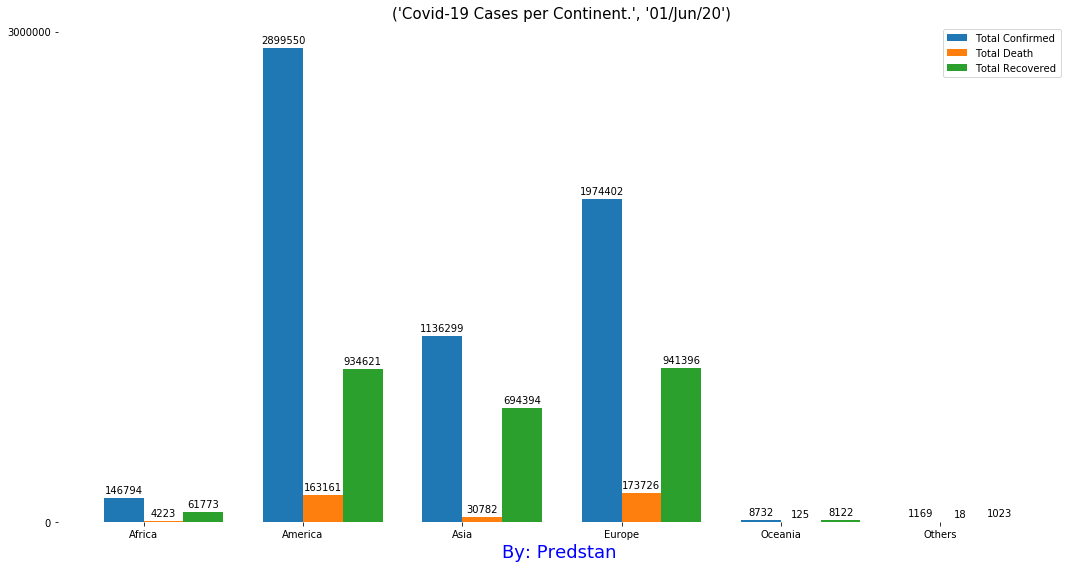

In [47]:

current_date = dt.date.today().strftime("%d/%b/%y")
current_date = 'Covid-19 Cases per Continent.',current_date
labels = combined_group["Continent"]
Total_confirmed = combined_group["Total_confirmed"]
Total_recovery = combined_group["Total_recovery"]
Total_death = combined_group["Total_death"]

x = np.arange(start=0, stop=12, step=2)             # the label locations
width = 0.5                          # the width of the bars

fig, ax = plt.subplots(figsize = (15,8))
rects1 = ax.bar(x - width/2, Total_confirmed, width, label='Total Confirmed')
rects2 = ax.bar(x + width/2, Total_death, width, label='Total Death')
rects3 = ax.bar(x + 3*(width/2) , Total_recovery, width, label = "Total Recovered")
# text for labels, title and custom x-axis tick labels, etc.
spines = ["bottom", "right", "left", "top"]
for spot in spines:
            ax.spines[spot].set_visible(False)
ax.set_title(current_date, fontsize = 15)
ax.set_yticks([0,3000000])
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_xlabel("By: Predstan", fontsize = 18, c = "blue")
ax.set_xlabel("By: Predstan ", fontsize = 18, c = "blue")


def autolabel(rects):
    """Reacts to display height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

In [48]:
combined[combined["Continent"] == "Others"]

,Country/Region,Total_confirmed,Total_death,Total_recovery,Continent
48,Diamond Princess,712,13,651,Others
104,MS Zaandam,9,2,0,Others
183,West Bank and Gaza,448,3,372,Others


In [49]:
fig.savefig("covid-19 per continents")

In [50]:
current_date = 'Covid-19 Cases per Continents.',current_date 

In [51]:
current_date 

('Covid-19 Cases per Continents.',
 ('Covid-19 Cases per Continent.', '01/Jun/20'))

In [52]:
Nigeria_confirmed = confirmed_per_day[confirmed_per_day["Country/Region"] == "Nigeria"]

In [53]:
Nigeria_confirmedd = Nigeria_confirmed.iloc[:, 60:]

In [54]:
df_t = Nigeria_confirmedd.T

In [55]:
df_t.reset_index()

,index,173
0,March_18,5
1,March_19,0
2,March_20,4
3,March_21,10
4,March_22,8
...,...,...
71,May_28,182
72,May_29,387
73,May_30,553
74,May_31,307


In [59]:
df_t = df_t.iloc[:76,:]
df_t 

,173
March_18,5
March_19,0
March_20,4
March_21,10
March_22,8
...,...
May_26,276
May_27,389
May_28,182
May_29,387


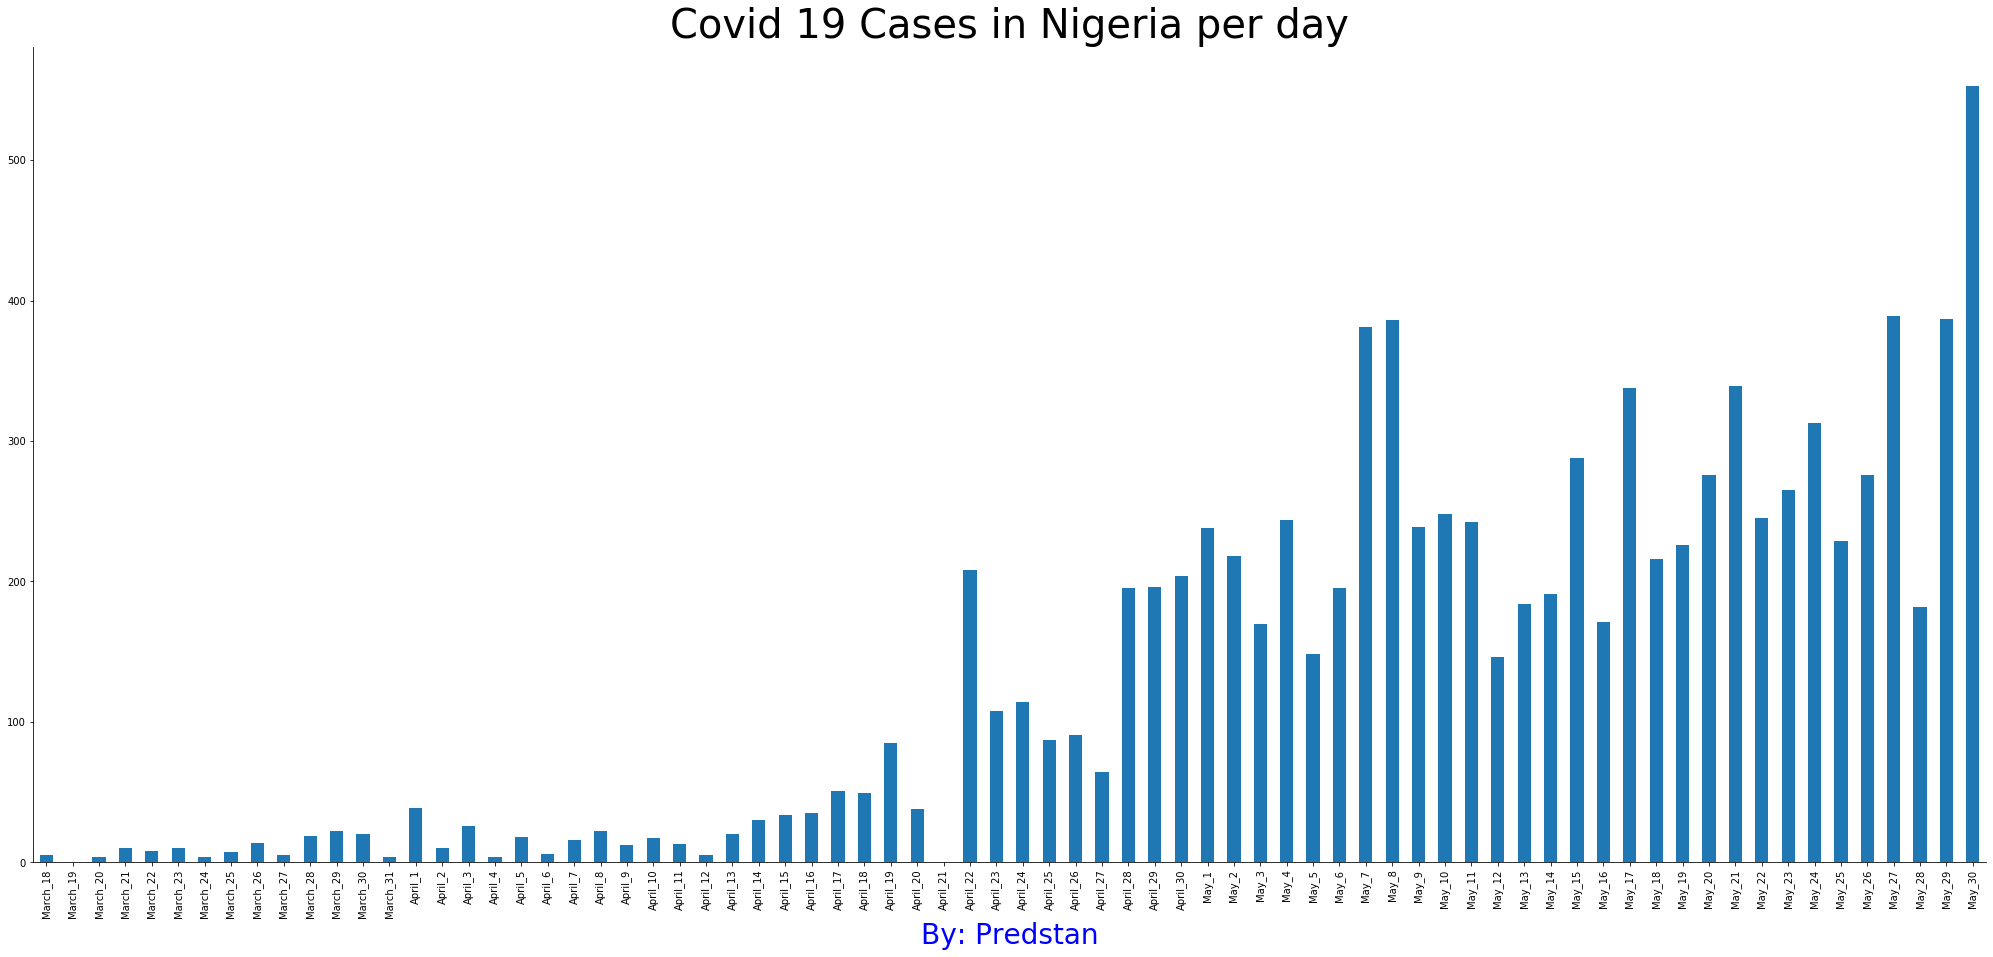

In [60]:
fig, ax = plt.subplots(figsize = (35,15))
ax = df_t[173].plot.bar(rot = 90)
spines = ["right", "top"]
for spot in spines:
            ax.spines[spot].set_visible(False)
ax.set_title("Covid 19 Cases in Nigeria per day", fontsize = 40)
ax.set_xlabel("By: Predstan", fontsize = 28, c = "blue")
fig.savefig("covid-19 Nigeria")